In [1]:
from fastai.vision.all import *
from models.VAE import VariationalAutoEncoder
from torchsummary import summary
from functools import partial
from util.utils import rmse_loss, vae_loss

In [2]:
path = Path('data/mnist_png')
if not path.exists():
    path = untar_data(URLs.MNIST, dest='data')

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [5]:
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42)
)

In [6]:
dataloaders = datablock.dataloaders(path)

In [18]:
model = VariationalAutoEncoder(
    input_dim=[1, 28, 28],
    conv_filters=[32, 64, 64, 64],
    conv_t_filters=[64, 64, 32, 1],
    kernel_sizes=[3, 3, 3, 3],
    strides=[1, 2, 2, 1],
    z_dim=2
).to(device='cuda')

In [8]:
summary(model.encoder, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 28, 28]          320
├─LeakyReLU: 1-2                         [-1, 32, 28, 28]          --
├─Conv2d: 1-3                            [-1, 64, 14, 14]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 14, 14]          --
├─Conv2d: 1-5                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-6                         [-1, 64, 7, 7]            --
├─Conv2d: 1-7                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-8                         [-1, 64, 7, 7]            --
├─Flatten: 1-9                           [-1, 3136]                --
├─VAELayer: 1-10                         [-1, 2]                   --
|    └─VAELinear: 2-1                    [-1, 2]                   --
|    |    └─Linear: 3-1                  [-1, 2]                   6,274
|    |    └─Linear: 3-2                  [-1, 2]                   6,

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 28, 28]          320
├─LeakyReLU: 1-2                         [-1, 32, 28, 28]          --
├─Conv2d: 1-3                            [-1, 64, 14, 14]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 14, 14]          --
├─Conv2d: 1-5                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-6                         [-1, 64, 7, 7]            --
├─Conv2d: 1-7                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-8                         [-1, 64, 7, 7]            --
├─Flatten: 1-9                           [-1, 3136]                --
├─VAELayer: 1-10                         [-1, 2]                   --
|    └─VAELinear: 2-1                    [-1, 2]                   --
|    |    └─Linear: 3-1                  [-1, 2]                   6,274
|    |    └─Linear: 3-2                  [-1, 2]                   6,

In [19]:
learner = Learner(
    dls=dataloaders,
    model=model,
    loss_func=partial(vae_loss, model=model)
)

SuggestedLRs(valley=0.00019054606673307717)

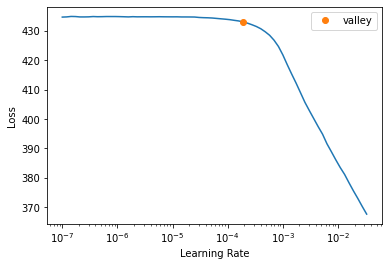

In [16]:
learner.lr_find()

In [ ]:
learner.fit(7, 3e-3)

epoch,train_loss,valid_loss,time
0,259.375122,259.251923,00:28
1,259.006195,259.260254,00:29
2,260.622498,259.190735,00:31
3,259.668671,259.251587,00:28
4,260.111633,259.057617,00:27
5,260.214935,259.106781,00:27
